In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import json
import seaborn as sns
import scipy as scp
import statsmodels.api as sm
import glob
import quandl

%run plot_timeseries.ipynb
quandl.ApiConfig.api_key = 'get_your_own_key'

In [15]:
# Retrieve TSLA data from Quandl
tesla = quandl.get('WIKI/TSLA')

In [18]:
tesla.tail(5)

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2018-03-21,310.25,322.44,310.19,316.53,5927881.0,0.0,1.0,310.25,322.44,310.19,316.53,5927881.0
2018-03-22,313.89,318.82,308.18,309.10,4914307.0,0.0,1.0,313.89,318.82,308.18,309.10,4914307.0
2018-03-23,311.25,311.61,300.45,301.54,6600538.0,0.0,1.0,311.25,311.61,300.45,301.54,6600538.0
2018-03-26,307.34,307.59,291.36,304.18,8324639.0,0.0,1.0,307.34,307.59,291.36,304.18,8324639.0
2018-03-27,304.00,304.27,277.18,279.18,13696168.0,0.0,1.0,304.00,304.27,277.18,279.18,13696168.0


<h3>The index of the dataframe should be a <b>datatime</b> </h3>

In [17]:
tesla.index

DatetimeIndex(['2010-06-29', '2010-06-30', '2010-07-01', '2010-07-02',
               '2010-07-06', '2010-07-07', '2010-07-08', '2010-07-09',
               '2010-07-12', '2010-07-13',
               ...
               '2018-03-14', '2018-03-15', '2018-03-16', '2018-03-19',
               '2018-03-20', '2018-03-21', '2018-03-22', '2018-03-23',
               '2018-03-26', '2018-03-27'],
              dtype='datetime64[ns]', name='Date', length=1949, freq=None)

<h3>A simple plot (the days and minutes ticks are infered). Minutes ticks are hidden if not set explicitly for pepriods bigger than 2 days. </h3>

(252, 12)
94


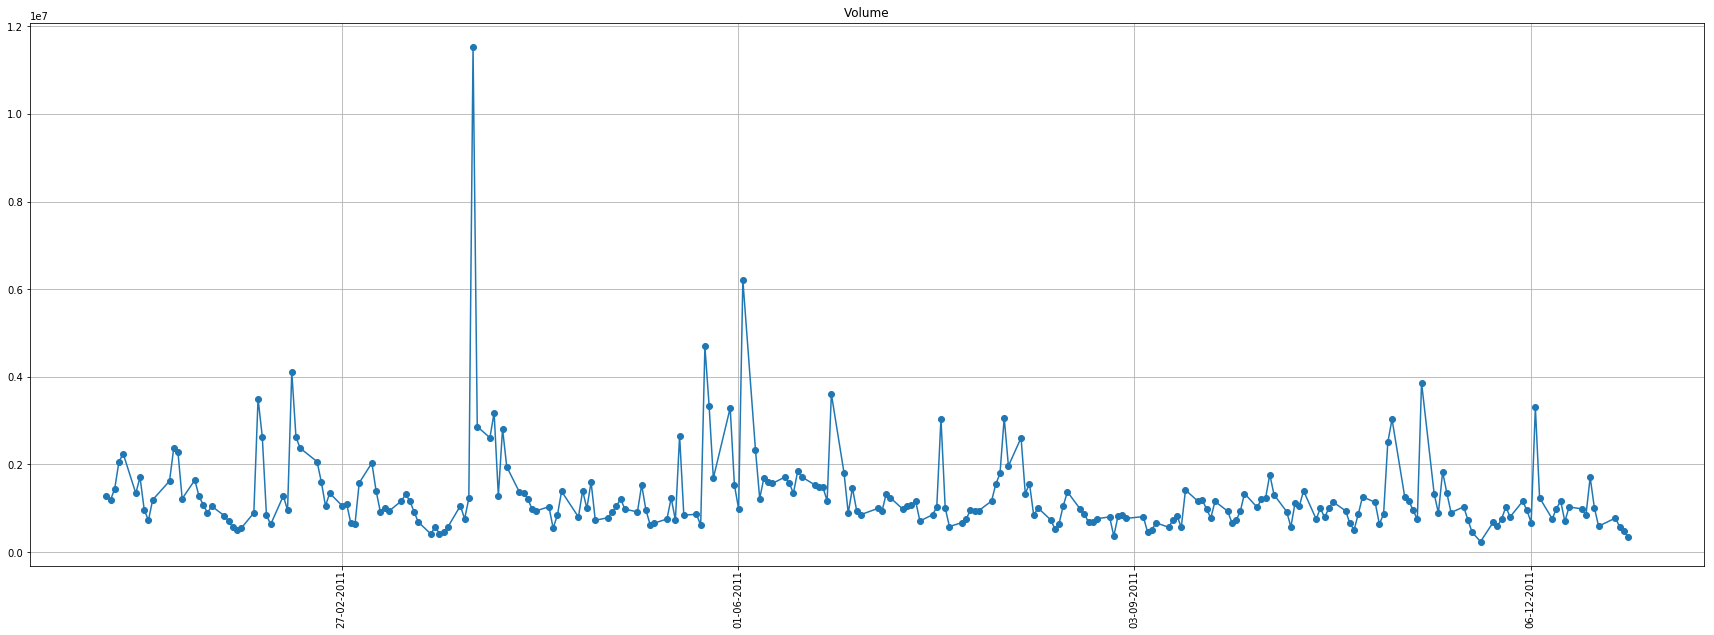

In [109]:
start_date = '01/01/2011 00:00'
end_date = '01/01/2012 00:00'
plot_timeseries(tesla,['Volume'],start_date,end_date);

(2, 12)


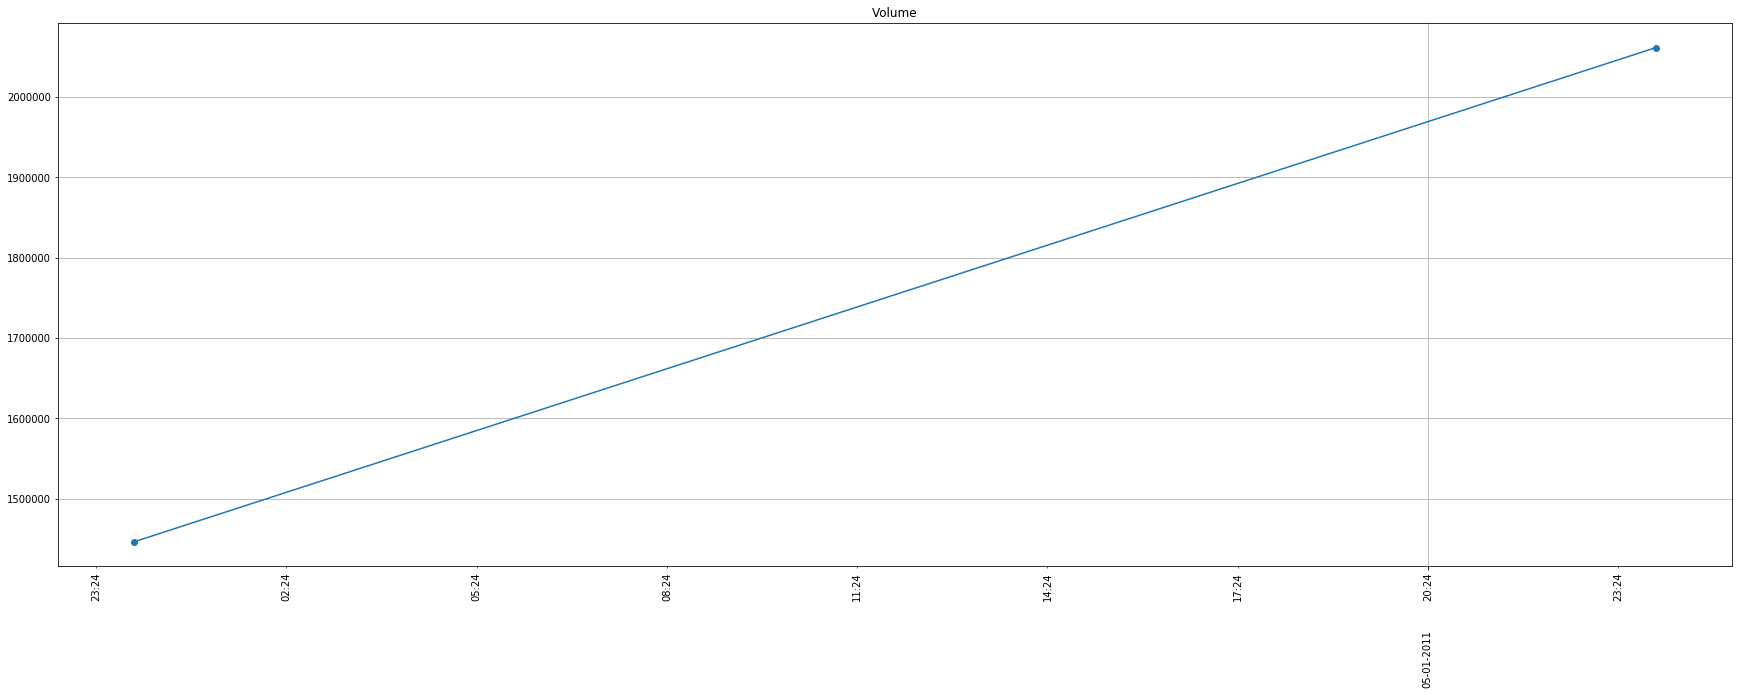

In [110]:
start_date = '04/01/2011 15:00'
end_date = '06/01/2011 11:00'
plot_timeseries(tesla,['Volume'],start_date,end_date,days_interval=1,minutes_interval=180);

<h3>You can specify the ticks directly but be careful with maxticks (from matplotlib). It will result in a error if you plot a 10 years period with 1 day ticks for example.</h3>

(252, 12)


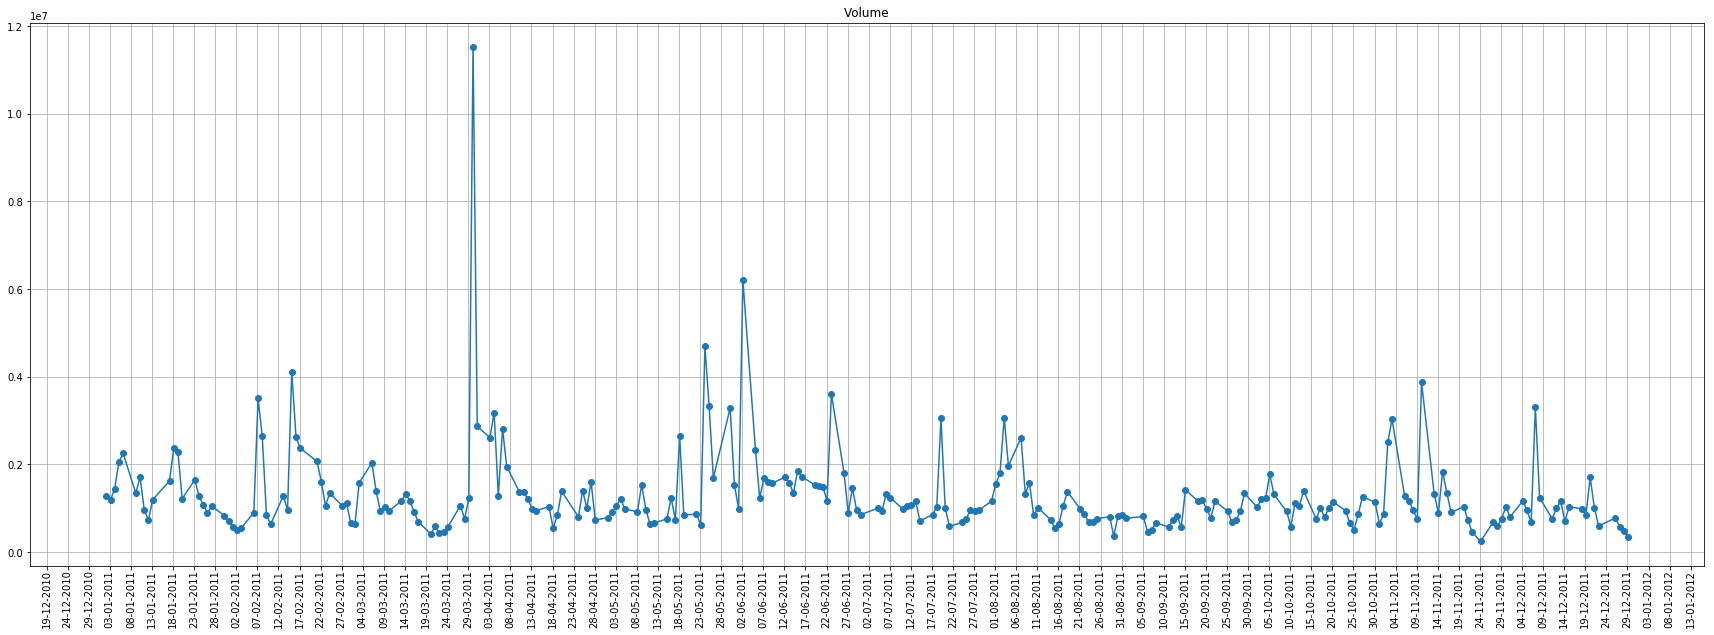

In [111]:
start_date = '01/01/2011 00:00'
end_date = '01/01/2012 00:00'
plot_timeseries(tesla,['Volume'],start_date,end_date,days_interval=5);

<h3>You can change the figure size and explort the figure </h3>

(2, 12)


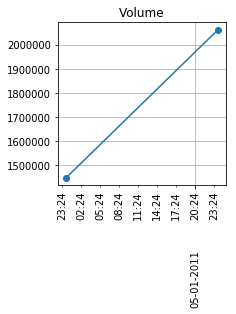

In [114]:
start_date = '04/01/2011 15:00'
end_date = '06/01/2011 11:00'
plot_timeseries(tesla,['Volume'],start_date,end_date,days_interval=1,minutes_interval=180,figure_size=[3,3],save_figure_name='save_figure_to_current_dir.png');

<h3>You can plot important events dates directly on the plot</h3>

(1045, 12)
94


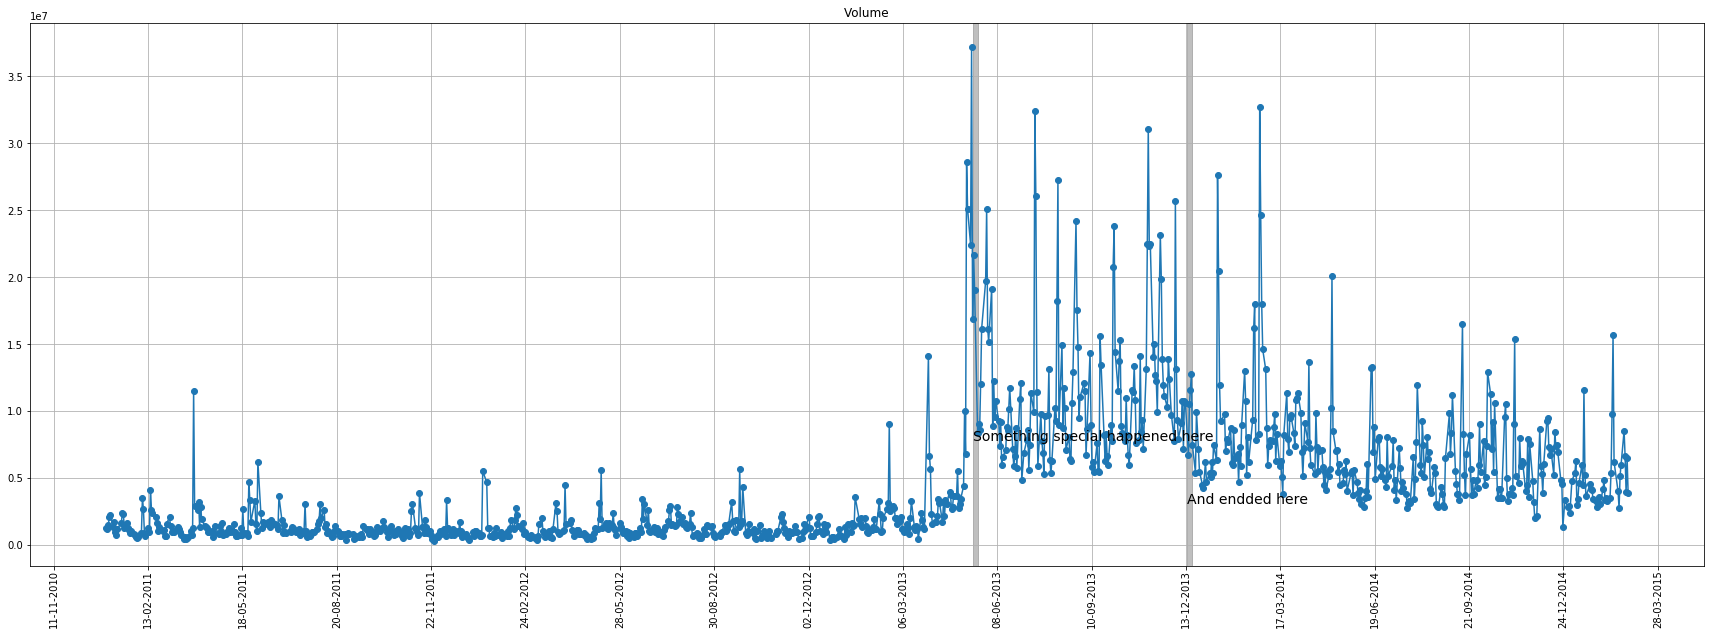

In [113]:
start_date = '01/01/2011 00:00'
end_date = '01/03/2015 00:00'
plot_timeseries(tesla,['Volume'],start_date,end_date,special_dates={'15/05/2013': 'Something special happened here','15/12/2013': 'And endded here'});

<h3>You can also plot the rolling mean of the variables </h3>

(1819, 12)
94


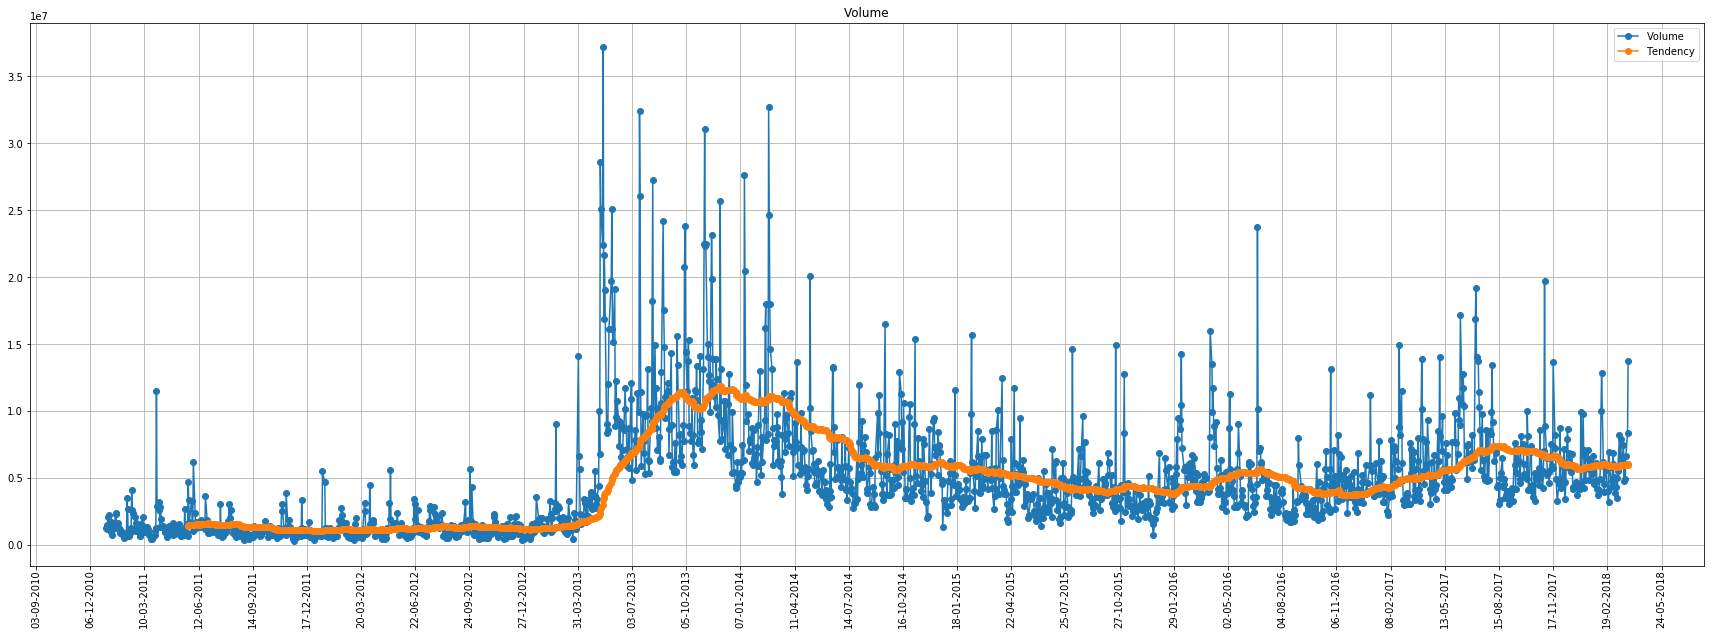

In [116]:
start_date = '01/01/2011 00:00'
end_date = '01/01/2019 00:00'
plot_timeseries(tesla,['Volume'],start_date,end_date,rolling_time=100,legend=['Volume','Tendency']);